# IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# DATA LOADING

In [2]:
ad=pd.read_csv("C:\\Users\\cathe\\Downloads\\Advertising.csv")

# DATA EXPLORATION

In [3]:
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
ad.sample(8)

,Unnamed: 0,TV,Radio,Newspaper,Sales
163,164,163.5,36.8,7.4,18.0
130,131,0.7,39.6,8.7,1.6
30,31,292.9,28.3,43.2,21.4
93,94,250.9,36.5,72.3,22.2
55,56,198.9,49.4,60.0,23.7
6,7,57.5,32.8,23.5,11.8
109,110,255.4,26.9,5.5,19.8
5,6,8.7,48.9,75.0,7.2


In [6]:
ad.shape

(200, 5)

In [7]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
ad.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
ad.index

RangeIndex(start=0, stop=200, step=1)

In [10]:
ad.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
ad.max()

Unnamed: 0    200.0
TV            296.4
Radio          49.6
Newspaper     114.0
Sales          27.0
dtype: float64

In [12]:
ad.min()

Unnamed: 0    1.0
TV            0.7
Radio         0.0
Newspaper     0.3
Sales         1.6
dtype: float64

In [13]:
ad.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

In [14]:
ad.mode()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,17.2,4.1,8.7,9.7
1,2,76.4,5.7,9.3,NaN
2,3,109.8,NaN,25.6,NaN
3,4,177.0,NaN,NaN,NaN
4,5,184.9,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [15]:
ad.median()

Unnamed: 0    100.50
TV            149.75
Radio          22.90
Newspaper      25.75
Sales          12.90
dtype: float64

In [16]:
ad.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [17]:
ad.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

# DATA CLEANING-CHECKING FOR NULL VALUES

In [18]:
ad.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# DATA VISUALIZATION

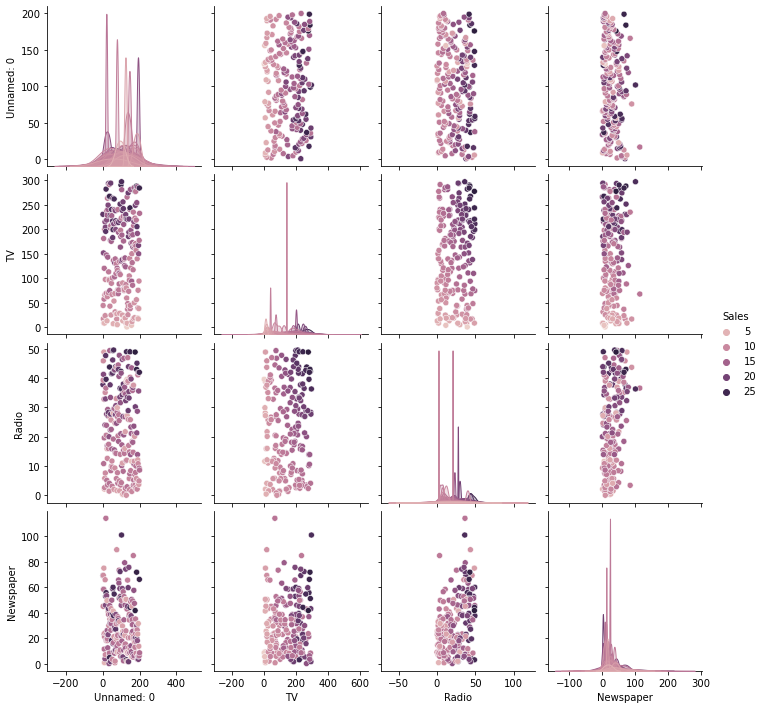

In [19]:
sns.pairplot(ad,hue="Sales")
plt.show()

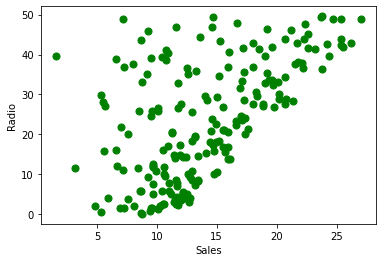

In [20]:
ad.plot(kind="scatter", x="Sales", y="Radio",color="green",s=50)
plt.show()

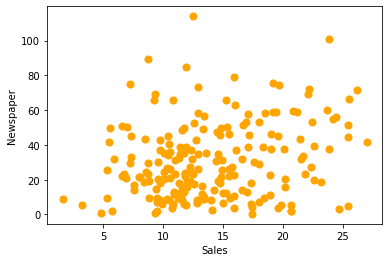

In [21]:
ad.plot(kind="scatter", x="Sales", y="Newspaper",color="orange",s=50 )
plt.show()

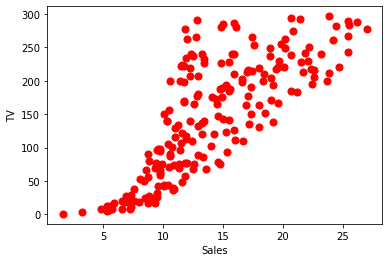

In [22]:
ad.plot(kind="scatter", x="Sales", y="TV",color="red",s=50)
plt.show()

# CORRELATION

In [23]:
ad.corr(method="pearson")

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [24]:
ad.corr(method="kendall")

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.011762,-0.073482,-0.110589,-0.034667
TV,0.011762,1.000000,0.041202,0.034156,0.621946
Radio,-0.073482,0.041202,1.000000,0.207077,0.419447
Newspaper,-0.110589,0.034156,0.207077,1.000000,0.132271
Sales,-0.034667,0.621946,0.419447,0.132271,1.000000


In [25]:
ad.corr(method="spearman")

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.014129,-0.108740,-0.160376,-0.050449
TV,0.014129,1.000000,0.056123,0.050840,0.800614
Radio,-0.108740,0.056123,1.000000,0.316979,0.554304
Newspaper,-0.160376,0.050840,0.316979,1.000000,0.194922
Sales,-0.050449,0.800614,0.554304,0.194922,1.000000


# HEATMAP FOR CORRELATION

<AxesSubplot:>

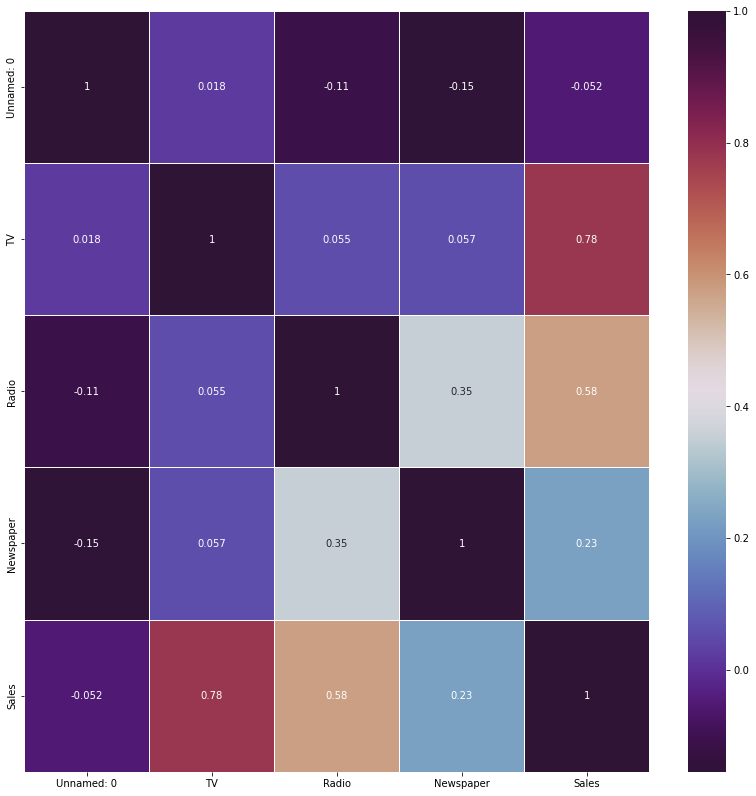

In [26]:
corr = ad.corr(method="pearson")
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap="twilight_shifted")


<AxesSubplot:>

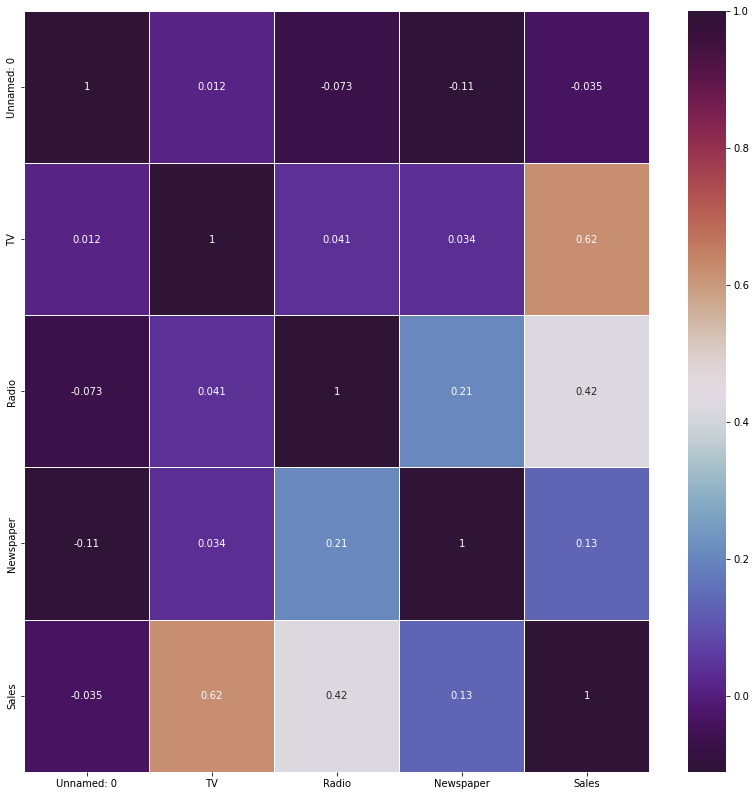

In [27]:
corr = ad.corr(method="kendall")
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap="twilight_shifted")


<AxesSubplot:>

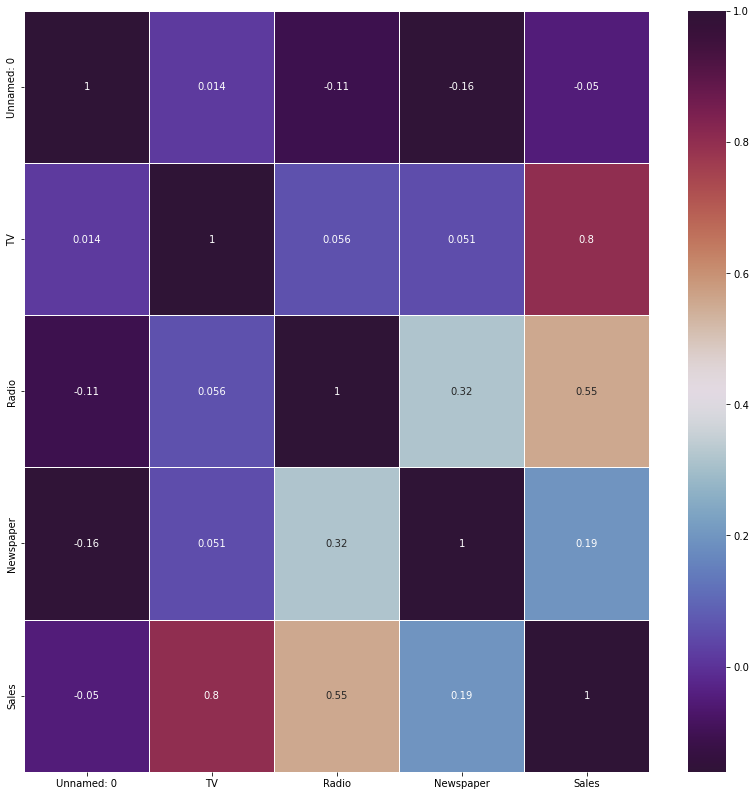

In [28]:
corr = ad.corr(method="spearman")
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap="twilight_shifted")



# MODEL TRAINING

In [29]:
x = ad.drop(columns=['Unnamed: 0','Sales'])
y = ad['Sales']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35,random_state=1)

# LINEAR REGRESSION

In [31]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [32]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = lreg.predict(x_train)
print("R-squared:", lreg.score(x_train, y_train).round(2))
print("Coefficient:", lreg.coef_.round(2))
print("Intercept:", lreg.intercept_.round(3))


R-squared: 0.89
Coefficient: [0.05 0.18 0.  ]
Intercept: 2.932


Text(0.5, 1.0, 'Residuals')

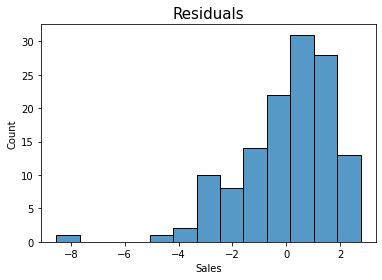

In [34]:
sns.histplot(y_train - y_pred)
plt.title("Residuals", size=15)

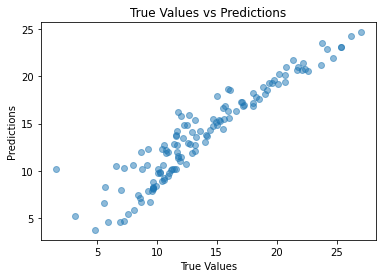

In [35]:
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [36]:
df = pd.DataFrame()
df['Price'] = y_train
df['Prediction'] = y_pred.round(2)
df['Residual'] = (y_train - y_pred).round(2)
df['Difference%'] = (np.absolute((y_train - y_pred) / y_train * 100)).round(2)
df

,Price,Prediction,Residual,Difference%
54,20.2,20.30,-0.10,0.51
84,21.7,20.67,1.03,4.74
183,26.2,24.24,1.96,7.47
158,7.3,10.32,-3.02,41.33
166,8.0,10.63,-2.63,32.90
...,...,...,...,...
133,19.6,19.29,0.31,1.56
137,20.8,21.01,-0.21,1.00
72,8.8,10.20,-1.40,15.94
140,10.9,9.44,1.46,13.43
